In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [52]:
allCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA", "GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF", "WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW", "LEN", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH", "TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]
#with outliers removed

# techCompanies = ["AAPL","MSFT","AMZN","TSLA","NVDA", "PYPL"]
df = pd.read_csv(allCompanies[0]+".csv", index_col=0)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df["Change"] = (df["Close"] - df["Open"]) / df["Open"] * 100
# df = pd.DataFrame()
df



,Date,Open,High,Low,Close,Volume,Change
0,"Feb 24, 2023",147.11,147.19,145.72,146.71,"55,469,600",-0.271905
1,"Feb 23, 2023",150.09,150.34,147.24,149.40,"48,394,200",-0.459724
2,"Feb 22, 2023",148.87,149.95,147.16,148.91,"51,011,300",0.026869
3,"Feb 21, 2023",150.20,151.30,148.41,148.48,"58,867,200",-1.145140
4,"Feb 17, 2023",152.35,153.00,150.85,152.55,"59,144,100",0.131277
...,...,...,...,...,...,...,...
3277,"Apr 28, 2010",9.40,9.43,9.16,9.34,"758,402,400",-0.638298
3278,"Apr 27, 2010",9.55,9.57,9.30,9.36,"709,343,600",-1.989529
3279,"Apr 26, 2010",9.71,9.73,9.58,9.63,"479,068,800",-0.823893
3280,"Apr 23, 2010",9.57,9.72,9.54,9.67,"796,955,600",1.044932


In [53]:
for i in range(1,len(allCompanies)):
  dfNew = pd.read_csv(allCompanies[i]+".csv", index_col=0)
  dfNew['Open'] = pd.to_numeric(dfNew['Open'], errors='coerce')
  dfNew["Change"] = (dfNew["Close"] - dfNew["Open"]) / dfNew["Open"] * 100
  df = df.merge(dfNew, on="Date", suffixes=["_"+allCompanies[i-1],"_"+allCompanies[i]])

In [54]:
# df["Change_TSLA"] = df["Change"]
df

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Change_AAPL,Open_AMZN,High_AMZN,Low_AMZN,...,Low_F,Close_F,Volume_F,Change_F,Open_HMC,High_HMC,Low_HMC,Close_HMC,Volume_HMC,Change_HMC
0,"Feb 24, 2023",147.11,147.19,145.72,146.71,"55,469,600",-0.271905,93.53,94.14,92.32,...,11.75,11.88,"50,631,600",0.507614,25.80,25.87,25.64,25.75,"913,900",-0.193798
1,"Feb 23, 2023",150.09,150.34,147.24,149.40,"48,394,200",-0.459724,96.12,96.43,93.67,...,11.88,12.07,"57,952,800",-2.029221,25.96,26.05,25.78,25.89,"713,000",-0.269646
2,"Feb 22, 2023",148.87,149.95,147.16,148.91,"51,011,300",0.026869,95.10,97.01,94.80,...,12.14,12.21,"52,844,700",-0.245098,25.85,25.96,25.78,25.82,"870,100",-0.116054
3,"Feb 21, 2023",150.20,151.30,148.41,148.48,"58,867,200",-1.145140,95.34,95.61,94.27,...,12.17,12.20,"77,724,200",-4.088050,26.03,26.28,25.86,25.90,"2,141,300",-0.499424
4,"Feb 17, 2023",152.35,153.00,150.85,152.55,"59,144,100",0.131277,97.80,97.94,95.65,...,12.65,12.89,"54,401,000",0.546022,25.40,25.57,25.30,25.54,"832,400",0.551181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,"May 16, 2018",46.52,47.12,46.50,47.04,"76,732,400",1.117799,78.88,79.72,78.83,...,11.20,11.40,"28,976,700",1.694915,33.04,33.15,32.96,33.15,"284,100",0.332930
1708,"May 15, 2018",46.69,46.77,46.28,46.61,"94,780,800",-0.171343,79.39,79.39,78.26,...,11.06,11.22,"26,950,100",1.081081,33.04,33.06,32.79,32.85,"701,300",-0.575061
1709,"May 15, 2018",46.69,46.77,46.28,46.61,"94,780,800",-0.171343,79.39,79.39,78.26,...,11.06,11.22,"26,950,100",1.081081,33.04,33.06,32.79,32.85,"701,300",-0.575061
1710,"May 14, 2018",47.25,47.38,46.97,47.04,"83,115,200",-0.444444,80.20,80.56,80.00,...,11.17,11.18,"27,903,100",-0.445236,33.42,33.50,33.31,33.31,"490,400",-0.329144


In [55]:
columns = ["Change_"+a for a in allCompanies]
columns.append("Date")
dfPrices = df[columns]
# dfPrices = dfPrices.set_index(dfPrices["Date"])
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
0,-0.271905,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,-0.341588,0.498919,...,-0.838192,-0.927247,-0.058038,-0.886802,1.093211,0.693909,0.547148,0.507614,-0.193798,"Feb 24, 2023"
1,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,-0.820837,...,-0.057542,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023"
2,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,-0.233173,...,-0.036049,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023"
3,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,-0.793413,...,-0.699201,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023"
4,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,-0.060168,...,0.541948,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1.117799,0.608519,0.408391,-0.272183,NaN,0.819672,0.412903,0.951374,0.952381,0.087203,...,0.306726,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018"
1708,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1709,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1710,-0.444444,-0.149626,0.018182,-0.570028,0.112337,-0.281162,-0.416983,-3.758655,0.000000,0.462046,...,0.072443,1.015965,-0.347395,-0.100503,-0.265369,-1.160281,-0.110824,-0.445236,-0.329144,"May 14, 2018"


In [56]:
# pyplot.figure(figsize=(15,15))
# scatter_matrix(dfPrices ,figsize=(12,12))
# pyplot.show()

In [57]:
mktcaps = [2380, 947.15, 1170, 1890, 469.01, 567.26, 82.15, 546.73]

sumT = 0
for i in mktcaps:
  sumT+=i
for i in range(0,len(mktcaps)):
  mktcaps[i]/=sumT
mktcaps

[0.2955677259913317,
 0.11762477801373522,
 0.14530010059237736,
 0.2347155471107634,
 0.058245470238317006,
 0.07044695304447177,
 0.01020205407150752,
 0.06789737093749612]

In [58]:

dfPrices["tech"] = (mktcaps[0]* dfPrices["Change_AAPL"]) + (mktcaps[1]* dfPrices["Change_AMZN"]) + (mktcaps[2]* dfPrices["Change_GOOG"]) + (mktcaps[3]* dfPrices["Change_MSFT"]) + (mktcaps[4]* dfPrices["Change_META"]) + (mktcaps[5]* dfPrices["Change_NVDA"]) + (mktcaps[6]* dfPrices["Change_PYPL"]) + (mktcaps[7]* dfPrices["Change_TSLA"]) 

<ipython-input-58-3c4a176f1716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrices["tech"] = (mktcaps[0]* dfPrices["Change_AAPL"]) + (mktcaps[1]* dfPrices["Change_AMZN"]) + (mktcaps[2]* dfPrices["Change_GOOG"]) + (mktcaps[3]* dfPrices["Change_MSFT"]) + (mktcaps[4]* dfPrices["Change_META"]) + (mktcaps[5]* dfPrices["Change_NVDA"]) + (mktcaps[6]* dfPrices["Change_PYPL"]) + (mktcaps[7]* dfPrices["Change_TSLA"])


In [59]:
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date,tech
0,-0.271905,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,-0.341588,0.498919,...,-0.927247,-0.058038,-0.886802,1.093211,0.693909,0.547148,0.507614,-0.193798,"Feb 24, 2023",-0.100358
1,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,-0.820837,...,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023",-0.414325
2,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,-0.233173,...,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023",-0.045763
3,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,-0.793413,...,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023",-1.206081
4,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,-0.060168,...,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023",0.046658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1.117799,0.608519,0.408391,-0.272183,NaN,0.819672,0.412903,0.951374,0.952381,0.087203,...,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018",NaN
1708,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018",-0.499285
1709,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018",-0.499285
1710,-0.444444,-0.149626,0.018182,-0.570028,0.112337,-0.281162,-0.416983,-3.758655,0.000000,0.462046,...,1.015965,-0.347395,-0.100503,-0.265369,-1.160281,-0.110824,-0.445236,-0.329144,"May 14, 2018",-0.432420


In [60]:
train_df = pd.concat([dfPrices.iloc[:, -1].shift(1), dfPrices.iloc[:, :-1]], axis=1)
train_df.loc[train_df["Change_AAPL"] > 0, "positive"] = 3
train_df.loc[train_df["Change_AAPL"] <= 0, "positive"] = -3
train_df = train_df.dropna()
train_df

,tech,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,...,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date,positive
1,-0.100358,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,...,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023",-3.0
2,-0.414325,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,...,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023",3.0
3,-0.045763,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,...,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023",-3.0
4,-1.206081,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,...,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023",3.0
5,0.046658,0.130285,-1.068441,0.251204,-0.179450,-0.708280,-0.591876,-0.182126,-4.146503,1.584654,...,0.000000,-0.167691,3.765690,0.653595,1.674923,0.214843,1.413983,0.396668,"Feb 16, 2023",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,-0.890991,-0.191489,0.025237,0.521415,0.391794,0.618557,-2.257083,-0.441122,1.119403,0.582524,...,-0.581395,0.098765,1.008065,-0.975177,-0.183438,-0.319703,0.788091,0.332025,"May 21, 2018",-3.0
1703,0.102637,-0.470085,-0.442646,0.433227,-0.441441,0.364545,-1.537230,1.113892,-2.792413,2.014099,...,0.898204,0.000000,-0.100959,-0.455373,-1.254246,-0.473115,-0.961538,-0.722456,"May 18, 2018",-3.0
1704,-0.354734,-0.531915,0.075921,-0.111132,0.591198,-0.599421,0.666450,2.009532,-0.472193,0.754717,...,-0.589102,-0.297767,0.453172,-0.045065,0.869107,0.134781,0.526316,0.000000,"May 17, 2018",-3.0
1706,-0.235303,1.117799,0.608519,0.408391,-0.272183,-0.215694,0.819672,0.412903,0.951374,0.952381,...,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018",3.0


In [61]:
train_df

,tech,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,...,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date,positive
1,-0.100358,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,...,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023",-3.0
2,-0.414325,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,...,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023",3.0
3,-0.045763,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,...,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023",-3.0
4,-1.206081,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,...,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023",3.0
5,0.046658,0.130285,-1.068441,0.251204,-0.179450,-0.708280,-0.591876,-0.182126,-4.146503,1.584654,...,0.000000,-0.167691,3.765690,0.653595,1.674923,0.214843,1.413983,0.396668,"Feb 16, 2023",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,-0.890991,-0.191489,0.025237,0.521415,0.391794,0.618557,-2.257083,-0.441122,1.119403,0.582524,...,-0.581395,0.098765,1.008065,-0.975177,-0.183438,-0.319703,0.788091,0.332025,"May 21, 2018",-3.0
1703,0.102637,-0.470085,-0.442646,0.433227,-0.441441,0.364545,-1.537230,1.113892,-2.792413,2.014099,...,0.898204,0.000000,-0.100959,-0.455373,-1.254246,-0.473115,-0.961538,-0.722456,"May 18, 2018",-3.0
1704,-0.354734,-0.531915,0.075921,-0.111132,0.591198,-0.599421,0.666450,2.009532,-0.472193,0.754717,...,-0.589102,-0.297767,0.453172,-0.045065,0.869107,0.134781,0.526316,0.000000,"May 17, 2018",-3.0
1706,-0.235303,1.117799,0.608519,0.408391,-0.272183,-0.215694,0.819672,0.412903,0.951374,0.952381,...,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018",3.0


Cross Validated mean squared error: 1.523
how many days: 100


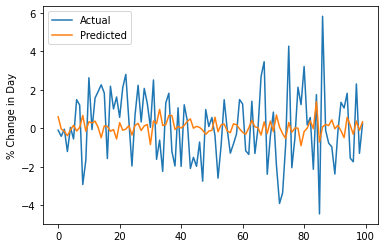

Num instances where predicted to go up and actually went up: 29
Num instances where predicted to go down and actually went down: 20
Num instances where predicted to go down and actually went up: 21
Num instances where predicted to go up and actually went down: 30
Proportion of instances where predicted correctly: 0.490
Proportion of instances where prediction was too low (would rather be >50%): 0.510


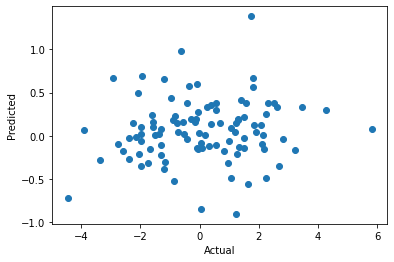

In [62]:
# @title Random Forest Regressor

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('tech', axis=1)
X = X.drop('positive', axis=1)
y = train_df['tech']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
test = train_df[:x]
train = train_df[x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
X_train = X_train.drop('tech', axis=1)
y_train = train['tech']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
X_test = X_test.drop('tech', axis=1)
y_test = test['tech']
y_pred = model.predict(X_test)



#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")

undershot = (y_test - y_pred > 0).sum()
overshot = (y_test - y_pred < 0).sum()
print(f"Proportion of instances where prediction was too low (would rather be >50%): {undershot / (undershot + overshot):.3f}")

In [63]:
pvt = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pvt["positive"] = (pvt["y_pred"] > 0) * 1 
pvt["bankroll_movement"] = ((pvt["y_test"] * pvt["positive"]) / 100) + 1

pvt.head(10)

,y_pred,y_test,positive,bankroll_movement
1,0.595409,-0.100358,1,0.998996
2,-0.041019,-0.414325,0,1.000000
3,-0.150910,-0.045763,0,1.000000
4,-0.387496,-1.206081,0,1.000000
5,-0.085334,0.046658,0,1.000000
6,0.156688,-0.552454,1,0.994475
9,-0.142478,1.486419,0,1.000000
10,0.046335,1.206007,1,1.012060
15,0.664483,-2.920806,1,0.970792
16,-0.155779,-1.653905,0,1.000000


Overall revenue change: 115.76%


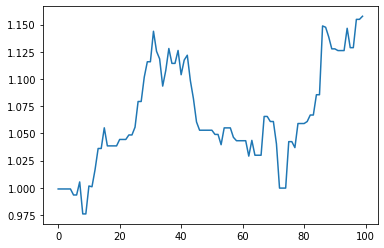

In [64]:
revenue_changes = pvt["bankroll_movement"].tolist()
var = 1
revenue_changes
bankroll = []

for i in range(len(revenue_changes)):
  var *= revenue_changes[i]
  bankroll.append(var)
plt.plot(bankroll, label='bankroll')

print(f"Overall revenue change: {var *100:.2f}%")

In [65]:
nasdaq = pd.read_csv("nasdaq.csv")
nasdaq['date'] = pd.to_datetime(nasdaq['date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
nasdaq

,date,_NDXD-open,_NDXD-high,_NDXD-low,_NDXD-close,_NDXD-vol
0,01/31/1985,125.00,125.00,125.00,125.00,0
1,02/01/1985,124.63,124.63,124.63,124.63,0
2,02/04/1985,126.22,126.22,126.22,126.22,0
3,02/05/1985,126.76,126.76,126.76,126.76,0
4,02/06/1985,127.16,127.16,127.16,127.16,0
...,...,...,...,...,...,...
9600,03/07/2023,12303.19,12344.04,12130.01,12152.17,542282
9601,03/08/2023,12181.06,12237.72,12102.28,12215.33,508597
9602,03/09/2023,12230.84,12340.45,11970.34,11995.88,506179
9603,03/10/2023,12001.70,12069.62,11789.86,11830.28,619350


In [66]:
testNew = dfPrices[0:x][["Date"]]
testNew["y_pred"] = y_pred
testNew

,Date,y_pred
0,"Feb 24, 2023",0.595409
1,"Feb 23, 2023",-0.041019
2,"Feb 22, 2023",-0.150910
3,"Feb 21, 2023",-0.387496
4,"Feb 17, 2023",-0.085334
...,...,...
95,"Nov 08, 2022",0.156817
96,"Nov 07, 2022",-0.312749
97,"Nov 04, 2022",0.378318
98,"Nov 04, 2022",-0.102313


In [67]:
# convert day to date
# test['date'] = pd.to_datetime(test["Date"].dt.strftime('%b %d, %Y'))
testNew['date'] = pd.to_datetime(testNew['Date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
# test['dateNew'] = test['DATE'].dt.strftime('%m/%d/%Y')
testNew["date"]

0     02/24/2023
1     02/23/2023
2     02/22/2023
3     02/21/2023
4     02/17/2023
         ...    
95    11/08/2022
96    11/07/2022
97    11/04/2022
98    11/04/2022
99    11/03/2022
Name: date, Length: 100, dtype: object

In [68]:
testProcess = testNew[["y_pred", "date"]]
testProcess

,y_pred,date
0,0.595409,02/24/2023
1,-0.041019,02/23/2023
2,-0.150910,02/22/2023
3,-0.387496,02/21/2023
4,-0.085334,02/17/2023
...,...,...
95,0.156817,11/08/2022
96,-0.312749,11/07/2022
97,0.378318,11/04/2022
98,-0.102313,11/04/2022


In [69]:
combo = testProcess.merge(nasdaq, on="date")
combo["Profit"] = (combo["_NDXD-close"] - combo["_NDXD-open"]) / combo["_NDXD-open"]
combo

,y_pred,date,_NDXD-open,_NDXD-high,_NDXD-low,_NDXD-close,_NDXD-vol,Profit
0,0.595409,02/24/2023,11979.80,12018.32,11900.84,11969.65,443265,-0.000847
1,-0.041019,02/23/2023,12224.44,12227.40,12003.31,12180.14,471458,-0.003624
2,-0.150910,02/22/2023,12085.67,12156.21,12006.04,12066.27,467127,-0.001605
3,-0.387496,02/21/2023,12205.21,12257.06,12058.23,12060.30,500254,-0.011873
4,-0.085334,02/17/2023,12352.30,12385.52,12233.79,12358.18,492523,0.000476
...,...,...,...,...,...,...,...,...
95,0.156817,11/08/2022,11039.58,11191.90,10897.53,11059.50,513450,0.001804
96,-0.312749,11/07/2022,10900.83,11001.16,10817.59,10977.00,445669,0.006988
97,0.378318,11/04/2022,10911.98,10934.62,10632.39,10857.03,545375,-0.005036
98,-0.102313,11/04/2022,10911.98,10934.62,10632.39,10857.03,545375,-0.005036


1.284967732397012


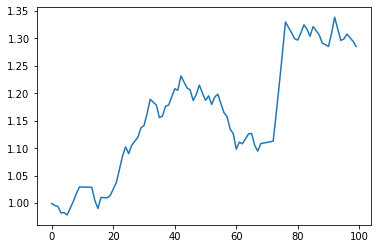

In [70]:
col = combo["Profit"]
start = 1
bank = []
for i in col:
  start *= (1 + i)
  bank.append(start)

plt.plot(bank, label='bankroll')
print(start)

# Industry


In [71]:
dfPrices = dfPrices.drop("tech", axis=1)
dfPrices

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Change_GLNCY,Change_BHP,...,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
0,-0.271905,-0.032075,-0.312395,1.037713,-0.296047,0.262648,0.068027,0.280141,-0.341588,0.498919,...,-0.838192,-0.927247,-0.058038,-0.886802,1.093211,0.693909,0.547148,0.507614,-0.193798,"Feb 24, 2023"
1,-0.459724,-0.312110,-1.150548,0.023256,-0.309125,0.955631,-0.922388,-0.902359,0.335289,-0.820837,...,-0.057542,-0.981767,0.224090,0.405680,0.389972,-4.384896,-0.685710,-2.029221,-0.269646,"Feb 23, 2023"
2,0.026869,0.725552,-0.141412,0.029228,-1.015388,0.226976,0.159236,1.480321,0.169779,-0.233173,...,-0.036049,-1.109185,-0.340329,-0.254712,0.758460,-0.824642,-0.462167,-0.245098,-0.116054,"Feb 22, 2023"
3,-1.145140,-0.797147,-1.276276,-1.279330,-0.711254,-1.642857,2.075702,-3.717255,-1.476620,-0.793413,...,-0.699201,-0.689655,-0.342075,-0.606673,-1.710914,-3.063870,-0.091241,-4.088050,-0.499424,"Feb 21, 2023"
4,0.131277,-0.613497,-0.504891,1.562684,-0.512741,-1.123388,-2.020997,4.160208,0.904605,-0.060168,...,0.541948,-0.846024,0.506472,0.452489,1.825677,0.395349,0.751255,0.546022,0.551181,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1.117799,0.608519,0.408391,-0.272183,NaN,0.819672,0.412903,0.951374,0.952381,0.087203,...,0.306726,0.434783,-0.249128,0.304260,0.768883,2.867190,0.284730,1.694915,0.332930,"May 16, 2018"
1708,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1709,-0.171343,-0.730571,-0.990826,-0.302899,0.082271,-2.863924,-0.077071,-0.263158,0.492611,0.310697,...,-0.161243,-1.004304,0.348259,0.304260,0.000000,1.483516,-0.097000,1.081081,-0.575061,"May 15, 2018"
1710,-0.444444,-0.149626,0.018182,-0.570028,0.112337,-0.281162,-0.416983,-3.758655,0.000000,0.462046,...,0.072443,1.015965,-0.347395,-0.100503,-0.265369,-1.160281,-0.110824,-0.445236,-0.329144,"May 14, 2018"


In [72]:

miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]

mktcaps = [59.63, 150.26, 171.78, 73.11, 626.85, 44.64, 356.80]

sumT = 0
for i in mktcaps:
  sumT+=i
for i in range(0,len(mktcaps)):
  mktcaps[i]/=sumT
mktcaps

[0.04020713789639059,
 0.10131686299365504,
 0.11582730417310039,
 0.04929639194373832,
 0.4226705415118639,
 0.03009972556925836,
 0.24058203591199334]

In [74]:
dfPrices["mining"] = (mktcaps[0]* dfPrices["Change_"+miningCompanies[0]])

for i in range(1,len(miningCompanies)):
  dfPrices["mining"] += (mktcaps[1]* dfPrices["Change_"+miningCompanies[i]])

dfPrices["mining"] 

0      -0.034661
1      -0.468075
2      -0.167545
3      -0.675977
4       0.088120
          ...   
1707    0.378618
1708    0.430763
1709    0.430763
1710    0.320826
1711    0.320826
Name: mining, Length: 1712, dtype: float64

In [84]:
testNew = dfPrices[0:x][["Date"]]
testNew["y_pred"] = y_pred
testNew['date'] = pd.to_datetime(testNew['Date'], errors='coerce').dt.strftime('%m/%d/%Y')
testProcess = testNew[["y_pred", "date"]]
testProcess

,y_pred,date
0,0.595409,02/24/2023
1,-0.041019,02/23/2023
2,-0.150910,02/22/2023
3,-0.387496,02/21/2023
4,-0.085334,02/17/2023
...,...,...
95,0.156817,11/08/2022
96,-0.312749,11/07/2022
97,0.378318,11/04/2022
98,-0.102313,11/04/2022


In [85]:
miningIndex = pd.read_csv("miningIndex.csv")
miningIndex['date'] = pd.to_datetime(miningIndex['date'], errors='coerce').dt.strftime('%m/%d/%Y') #.date
miningIndex

,date,_5SP151040-open,_5SP151040-high,_5SP151040-low,_5SP151040-close,_5SP151040-vol
0,09/11/1989,92.8170,92.8170,92.8170,92.8170,0
1,09/12/1989,92.3110,92.3110,92.3110,92.3110,0
2,09/13/1989,91.8414,91.8414,91.8414,91.8414,0
3,09/14/1989,91.5850,91.5850,91.5850,91.5850,0
4,09/15/1989,92.2557,92.2557,92.2557,92.2557,0
...,...,...,...,...,...,...
8442,03/07/2023,244.4600,245.0200,237.1700,237.3800,279403
8443,03/08/2023,237.7400,241.2100,236.5900,239.0500,189765
8444,03/09/2023,239.3700,241.3700,231.4500,232.3600,197401
8445,03/10/2023,233.3700,233.4900,223.5100,224.6200,305816


In [87]:
combo = testProcess.merge(miningIndex, on="date")
combo["Profit"] = (combo["_5SP151040-close"] - combo["_5SP151040-open"]) / combo["_5SP151040-open"]
combo

,y_pred,date,_5SP151040-open,_5SP151040-high,_5SP151040-low,_5SP151040-close,_5SP151040-vol,Profit
0,0.595409,02/24/2023,228.50,231.57,227.77,231.57,214224,0.013435
1,-0.041019,02/23/2023,237.47,237.99,230.86,234.37,229773,-0.013054
2,-0.150910,02/22/2023,238.87,241.02,236.36,237.36,222291,-0.006321
3,-0.387496,02/21/2023,242.73,245.42,239.47,240.74,246676,-0.008198
4,-0.085334,02/17/2023,242.63,242.84,239.90,241.61,220944,-0.004204
...,...,...,...,...,...,...,...,...
95,0.156817,11/08/2022,201.86,210.38,200.32,206.34,321722,0.022194
96,-0.312749,11/07/2022,202.50,202.91,199.79,200.49,201092,-0.009926
97,0.378318,11/04/2022,198.66,203.98,196.46,201.51,430888,0.014346
98,-0.102313,11/04/2022,198.66,203.98,196.46,201.51,430888,0.014346


1.207862193538993


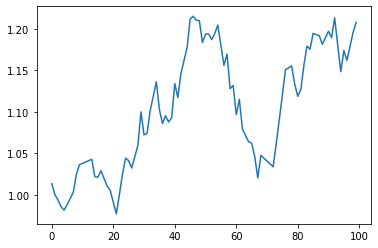

In [88]:
col = combo["Profit"]
start = 1
bank = []
for i in col:
  start *= (1 + i)
  bank.append(start)

plt.plot(bank, label='bankroll')
print(start)